In [1]:
import glob
data_directory = '/lustre/pipeline/beam02/' #replace yyyymm accordingly
import sys
from suncasa.dspec import dspec
sys.path.insert(0, '/data07/peijinz/suncasa-src')

from copy import copy
from matplotlib import colors
import matplotlib.pyplot as plt

from matplotlib.dates import AutoDateFormatter, AutoDateLocator, num2date
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.time import Time
import numpy as np

In [2]:
cal_factor_csv = "/lustre/bin.chen/realtime_pipeline/caltables_beam/*.csv"

cal_factor_csv_files = sorted(glob.glob(cal_factor_csv))

def get_cal_factor(cal_factor_file):
    import csv
    with open(cal_factor_file, 'r') as f:
        reader = csv.reader(f)
        cal_factors = list(reader)
    freq_num = [ a[0] for a in cal_factors[1:]]
    cal_num = [ a[1] for a in cal_factors[1:]]
    freq_num = np.array(freq_num, dtype=float)
    cal_num = np.array(cal_num, dtype=float)
    return freq_num, cal_num

freq_num, cal_num = get_cal_factor(cal_factor_csv_files[-2])

In [3]:
cal_factor_csv_files[-2]

# get filename from full path
date_cal_lst = [ cal_factor_csv_f.split('/')[-1].split('_')[0] 
              for cal_factor_csv_f in cal_factor_csv_files]

In [4]:
date_cal_lst

['20230502',
 '20230622',
 '20230727',
 '20230818',
 '20230830',
 '20230906',
 '20230906',
 '20230918',
 '20231012',
 '20231109',
 '20231214',
 '20240118',
 '20240210',
 '20240303']

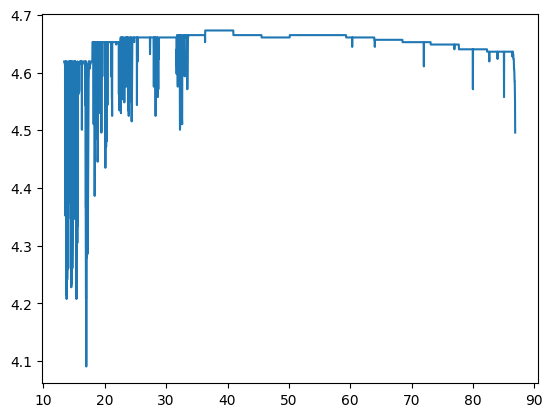

In [5]:
plt.plot(freq_num/1e6, np.log10(cal_num))
#plt.xlim(66, 69)

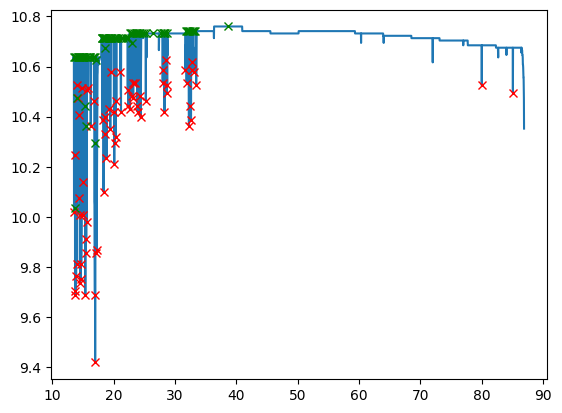

In [6]:
# find spikes and remove it
from scipy.signal import find_peaks
peaks, _ = find_peaks(-np.log(cal_num), prominence=0.1)

peaks_v1, _ =find_peaks(np.log(cal_num), prominence=0.2)


plt.plot(freq_num/1e6, np.log(cal_num))
plt.plot(freq_num[peaks]/1e6, np.log(cal_num[peaks]), "rx")
plt.plot(freq_num[peaks_v1]/1e6, np.log(cal_num[peaks_v1]), "gx")
cal_num_new = copy(cal_num)
freq_num_new = copy(freq_num)

# remove the spikes
freq_num_new = np.delete(freq_num_new, np.concatenate((peaks, peaks_v1)))
cal_num_new = np.delete(cal_num_new, np.concatenate((peaks, peaks_v1)))

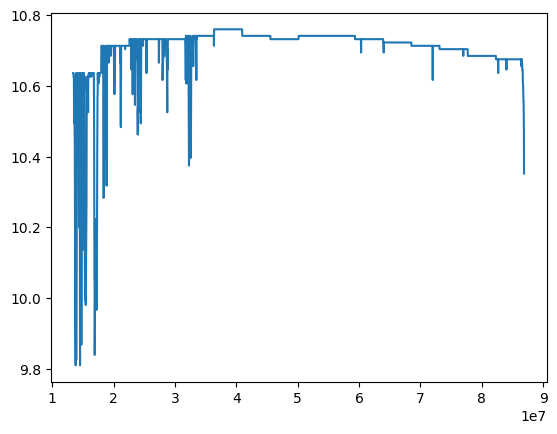

In [7]:
plt.plot(freq_num_new, np.log(cal_num_new))

In [8]:
files = glob.glob(data_directory + '*')
files.sort()  
d = dspec.Dspec()
d.read(files[0], source='lwa', timebin=32, freqbin=1, stokes='IV')

Processing 1 of 1 files


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


Data time range is from 2024-02-16T22:54:00.021 to 2024-02-16T23:23:59.955
Data has 28038 time stamps and 3072 frequency channels
Reading dynamic spectrum for stokes IV
Output time range is from 2024-02-16T22:54:01.016 to 2024-02-16T23:23:58.575
Output data has 876 time stamps and 3072 frequency channels


In [9]:

datacal = d.data / cal_num[None,None,:,None]


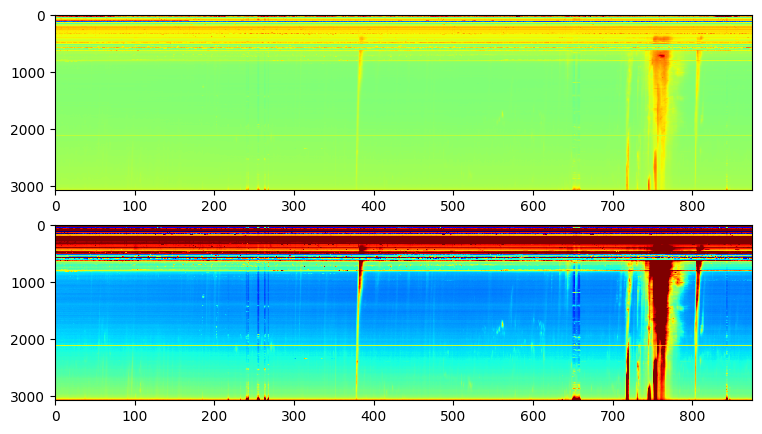

In [10]:
datathis = d.data[0,0,:,:]
datathis[datathis<=0] = np.nan


fig, ax = plt.subplots(2, 1, figsize=(9, 5))
ax  = ax.ravel()

ax[0].imshow(np.log10(datathis), aspect='auto', 
           #extent=[d.freq_axis[0], d.freq_axis[-1], 
           #        d.time_axis[-1], d.time_axis[0]],
            cmap='jet', interpolation='none')

#datacal = datathis / np.stack([cal_num]*datathis.shape[1], axis=1)


ax[1].imshow(np.log10(datacal[0,0,:,:].squeeze()), aspect='auto', 
           #extent=[d.freq_axis[0], d.freq_axis[-1], 
           #        d.time_axis[-1], d.time_axis[0]],
            cmap='jet', interpolation='none', vmin=-0.1, vmax=1)

In [11]:
njit_logo_str

NameError: name 'njit_logo_str' is not defined

ploting dynamic spectrum...


(-0.5, 119.5, 119.5, -0.5)

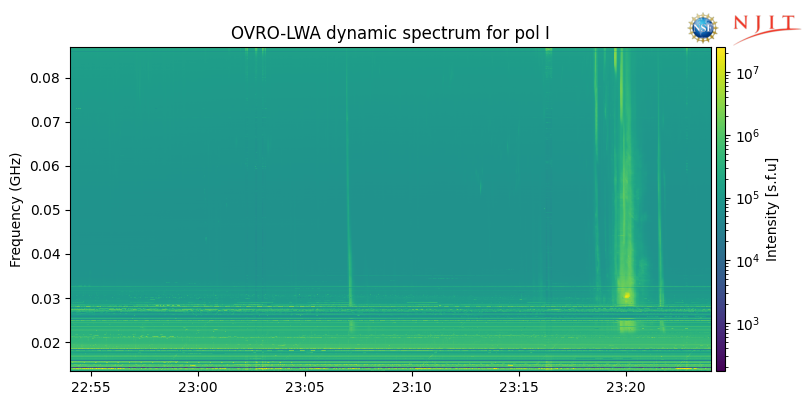

In [25]:
fig_this = d.plot()
from ovrolwasolar.visualization import njit_logo_str, nsf_logo
import base64
import io
import matplotlib.image as mpimg


ax_logo1 = fig_this.add_axes([0.89, 0.91, 0.15, 0.08])
img1 = base64.b64decode(njit_logo_str)
img1 = io.BytesIO(img1)
img1 = mpimg.imread(img1, format='png')
ax_logo1.imshow(img1)
ax_logo1.axis('off')

ax_logo2 = fig_this.add_axes([0.81, 0.91, 0.15, 0.09])
img2 = base64.b64decode(nsf_logo)
img2 = io.BytesIO(img2)
img2 = mpimg.imread(img2, format='png')
ax_logo2.imshow(img2)
ax_logo2.axis('off')


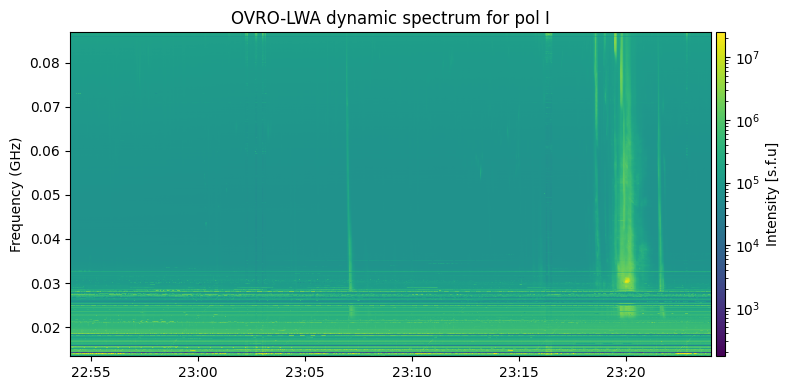

(0.2, 0.8)

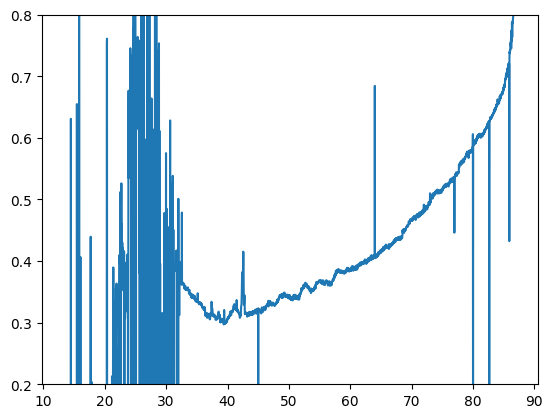

In [9]:
plt.plot(d.freq_axis/1e6, np.log10(datacal[:,-3]))
plt.ylim(0.2, 0.8)

(0.2, 0.8)

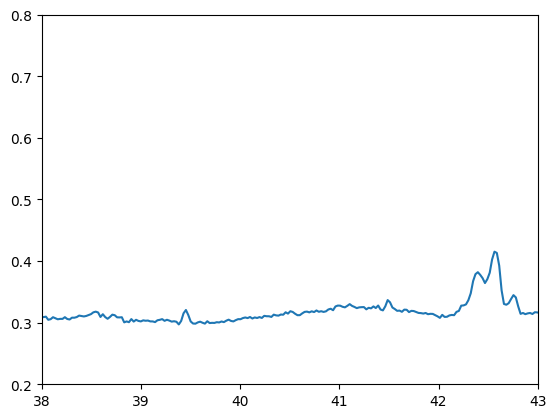

In [22]:
plt.plot(d.freq_axis/1e6, np.log10(datacal[:,-3]))
plt.xlim(38, 43)
plt.ylim(0.2, 0.8)

(0.2, 0.8)

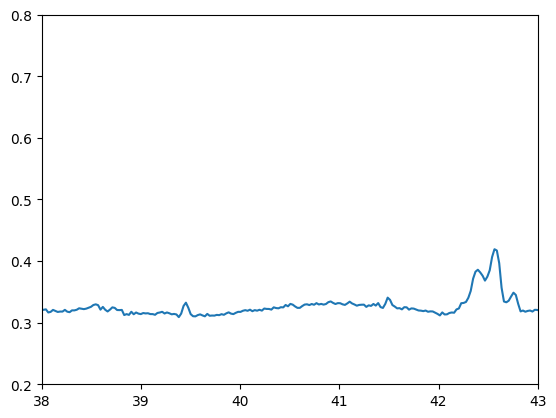

In [23]:
plt.plot(d.freq_axis/1e6, np.log10(datathis[:,-3]/cal_num[2000]))
plt.xlim(38, 43)
plt.ylim(0.2, 0.8)

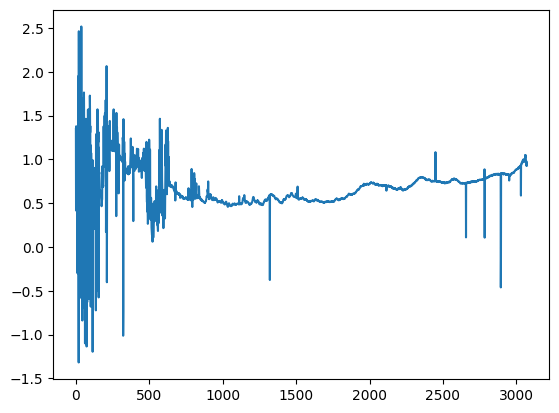

In [97]:
plt.plot(np.log10(datacal[:,-10]))

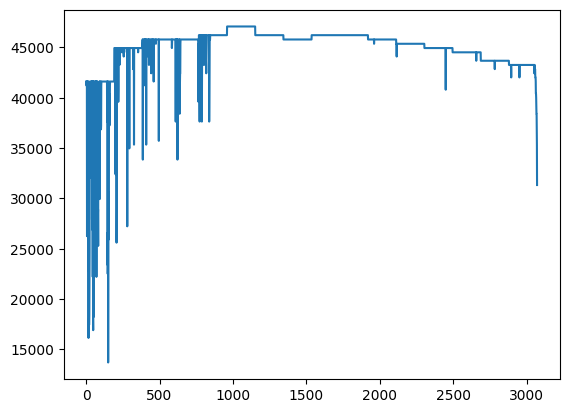

In [98]:
plt.plot(cal_num)

ploting dynamic spectrum...


Text(0.5, 1.0, '2024-02-25 21:42:01 - 2024-02-25 22:11:58')

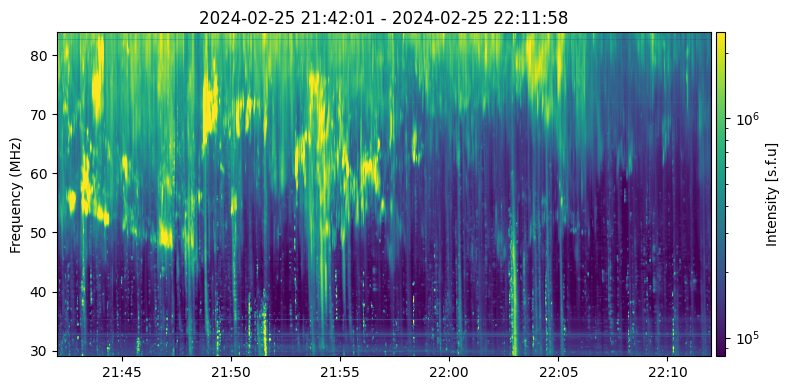

In [32]:
fig = d.plot(freq_unit='MHz', pol='I', vmin=1e4, plot_fast=True,minmaxpercentile=True,vmax2=0.5,vmin2=-0.5)

ax = fig.get_axes()[0]
locator = AutoDateLocator(minticks=2)
ax.xaxis.set_major_locator(locator)
                # ax1.xaxis.set_major_formatter(AutoDateFormatter(locator))
formatter = AutoDateFormatter(locator)
formatter.scaled[1 / 24] = '%H:%M'
formatter.scaled[1 / (24 * 60)] = '%H:%M'
ax.xaxis.set_major_formatter(formatter)
ax.set_title(d.time_axis[0].strftime('%Y-%m-%d %H:%M:%S') + ' - ' + d.time_axis[-1].strftime('%Y-%m-%d %H:%M:%S'))

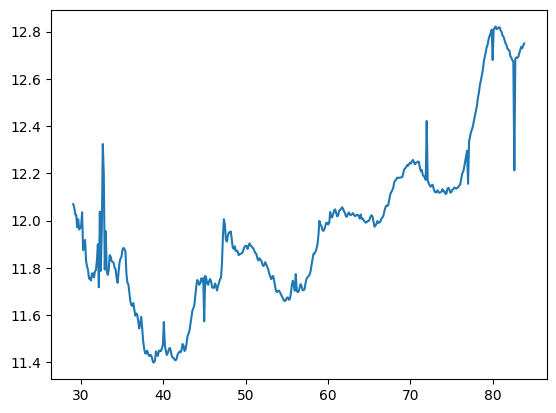

In [41]:
plt.plot(d.freq_axis/1e6,np.log(d.data[0,0,:,-1]))

In [86]:
time_range_all =[ d.time_axis[0] , d.time_axis[-1]]


In [87]:
def divide_time_in_hours(time_start, time_end, hour_length=1/24):
    # Calculate the total duration in days
    total_duration = time_end.mjd - time_start.mjd

    # Convert duration to hours
    total_hours = total_duration / hour_length
    full_hours = int(total_hours)

    # Check if the last hour is less than 0.5 hours
    if total_hours % 1 < 0.5 and full_hours > 0:
        full_hours -= 1

    # Generate time sections
    time_sections = [(time_start + i * hour_length, time_start + (i + 1) * hour_length) for i in range(full_hours)]

    # Add the remaining time to the last section if there's a remainder
    if total_hours % 1 >= 0.5 or full_hours == 0:
        time_sections.append((time_start + full_hours * hour_length, time_end))

    return time_sections

In [90]:


def rebin1d(arr, new_len):
    shape = (new_len, len(arr) // new_len)
    return arr.reshape(shape).mean(1)



def rebin2d(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

def ds_plot_fast(d_obj, pol='I', vmin=None, vmax=None, norm='log', cmap='viridis', cmap2='viridis', vmin2=None, vmax2=None,
             timerange=None, freqrange=None, ignore_gaps=True, freq_unit='MHz', spec_unit=None):
    if pol not in ['RR', 'LL', 'RRLL', 'XX', 'YY', 'XY', 'YX', 'XXYY', 'I', 'V', 'IV', 'IP']:
            print("Please enter 'RR', 'LL', 'RRLL','XX', 'YY', 'XY', 'YX', 'XXYY', 'I', 'V', 'IV', or 'IP' for pol")
            return 0
    try:
        cmap = copy(plt.get_cmap(cmap))
    except:
        cmap = copy(plt.get_cmap('viridis'))
    cmap.set_bad(cmap(0.0))

    if norm == 'linear':
        norm = colors.Normalize(vmax=vmax, vmin=vmin)
    if norm == 'log':
        norm = colors.LogNorm(vmax=vmax, vmin=vmin)

    if not isinstance(norm, object):
        print('color normalization is not defined as matplotlib.colors. Use default LogNorm.')
        norm = colors.LogNorm(vmax=vmax, vmin=vmin)

    spec = d_obj.data
    bl = d_obj.bl
    freq = d_obj.freq_axis


    if spec_unit is None:
            spec_unit = d_obj.spec_unit
    elif spec_unit.lower() != d_obj.spec_unit.lower():
        if spec_unit.lower() == 'sfu' and d_obj.spec_unit.lower() == 'jy':
            spec = np.copy(d_obj.data) / 1e4
        elif spec_unit.lower() == 'jy' and d_obj.spec_unit.lower() == 'sfu':
            spec = np.copy(d_obj.data) * 1e4
        else:
            print('Spectrum unit conversion from {0:s} to {1:s} not supported'.format(d_obj.spec_unit, spec_unit))
            print('Use the original one.')
            spec_unit = d_obj.spec_unit
    # The following is only for the plots
    if spec_unit.lower() == 'jy':
        spec_unit_print = 'Jy'
    if spec_unit.lower() == 'k':
        spec_unit_print = 'K'
    if spec_unit.lower() == 'sfu':
        spec_unit_print = 's.f.u'

    if spec.ndim == 2:
        nfreq, ntim = len(d_obj.freq_axis), len(d_obj.time_axis)
        npol = 1
        nbl = 1
        polnames = d_obj.pol
    else:
        (npol, nbl, nfreq, ntim) = spec.shape
        polnames = d_obj.pol
        if len(polnames) != npol:
            print('The polarization dimension in the data {0:d} does not match the names {1:d}. Abort.'.format(npol, len(polnames)))

    tim_ = d_obj.time_axis
    tim_plt = tim_.plot_date

    if timerange:
        if isinstance(timerange[0], str):
            timerange = Time(timerange)
        tidx = np.where((tim_ >= timerange[0]) & (tim_ <= timerange[1]))[0]
    else:
        tidx = range(ntim)

    if ignore_gaps:
        df = np.median(freq[1:] - freq[:-1])
        fbreak, = np.where(freq[1:] - freq[:-1] > 2 * df)
        for n, fb in enumerate(fbreak):
            loc = fb + n + 1
            freq = np.concatenate((freq[:loc], np.array([freq[loc - 1] + df]), freq[loc:]))

    if freqrange:
        if freq_unit.lower() == 'ghz':
            fidx = np.where((freq >= freqrange[0] * 1e9) & (freq <= freqrange[1] * 1e9))[0]
        if freq_unit.lower() == 'mhz':
            fidx = np.where((freq >= freqrange[0] * 1e6) & (freq <= freqrange[1] * 1e6))[0]
        if freq_unit.lower() == 'kHz':
            fidx = np.where((freq >= freqrange[0] * 1e3) & (freq <= freqrange[1] * 1e3))[0]
    else:
        fidx = range(nfreq)


    # setup plot parameters
    print('ploting dynamic spectrum...')

    for b in range(nbl):
        if pol not in ['RRLL', 'XXYY', 'IV', 'IP']:
            if spec.ndim == 2:
                spec_plt = spec[tidx,fidx]
            else:
                if pol in ['RR', 'XX']:
                    spec_plt = spec[0, b, :, :]
                elif pol in ['LL', 'YY']:
                    spec_plt = spec[1, b, :, :]
                elif pol in ['XY']:
                    spec_plt = spec[2, b, :, :]
                elif pol in ['YX']:
                    spec_plt = spec[3, b, :, :]
                elif pol == 'I':
                    if ('XX' in polnames) and ('YY' in polnames):
                        spec_plt = spec[0, b, :, :] + spec[1, b, :, :]
                    elif ('RR' in polnames) and ('LL' in polnames):
                        spec_plt = (spec[0, b, :, :] + spec[1, b, :, :]) / 2.
                    elif ('I' in polnames):
                        spec_plt = spec[0, b, :, :]
                elif pol == 'V':
                    if ('XX' in polnames) and ('YY' in polnames):
                        #TODO: This does not seem to be correct. @Sijie Yu, could you please check?
                        spec_plt = spec[0, b, :, :] - spec[1, b, :, :]
                    elif ('RR' in polnames) and ('LL' in polnames):
                        spec_plt = (spec[0, b, :, :] - spec[1, b, :, :]) / 2.
                    elif ('V' in polnames):
                        spec_plt = spec[1, b, :, :]
            if ignore_gaps:
                for n, fb in enumerate(fbreak):
                    loc = fb + n + 1
                    spec_plt = np.concatenate((spec_plt[:loc], np.zeros((1, ntim)) + np.nan, spec_plt[loc:]), 0)


            spec_plt = spec_plt[fidx, tidx]

            fig = plt.figure(figsize=(8, 4), dpi=100)
            ax = fig.add_subplot(111)

            if freq_unit.lower() == 'ghz':
                freq_plt = freq / 1e9
            if freq_unit.lower() == 'mhz':
                freq_plt = freq / 1e6
            if freq_unit.lower() == 'khz':
                freq_plt = freq / 1e3

            # Change the default for Stokes V
            if pol == 'V':
                cmap = 'gray'
                if (vmax is None) and (vmin is None):
                    vmax = np.nanmax(np.abs(spec_plt))
                    vmin = -vmax
                elif (vmax is None) and not (vmin is None):
                    vmax = -vmin
                elif not (vmax is None) and (vmin is None):
                    vmin = -vmax
                norm = colors.Normalize(vmax=vmax, vmin=vmin)

            ds_shape = spec_plt.shape
            # compress in time (idx1)
            if ds_shape[1] > 2100:

                pix_rebin = ds_shape[1] // 2048
                new_len = (ds_shape[1] // pix_rebin) 
                new_len_total = new_len * pix_rebin

                spec_plt = rebin2d(spec_plt[:,0:new_len_total], (ds_shape[0], new_len)) 
                #tim_plt = rebin1d(tim_plt[0:new_len_total], 2048)

            im = ax.imshow(spec_plt, cmap=cmap, norm=norm, aspect='auto', origin='lower',
                           extent=[tim_plt[tidx[0]], tim_plt[tidx[-1]], freq_plt[fidx[0]], freq_plt[fidx[-1]]] )
            
            # make colorbar
            divider = make_axes_locatable(ax)
            cax_spec = divider.append_axes('right', size='1.5%', pad=0.05)
            clb_spec = plt.colorbar(im, ax=ax, cax=cax_spec)
            clb_spec.set_label('Intensity [{}]'.format(spec_unit_print))

            def format_coord(x, y):
                col = np.argmin(np.absolute(tim_plt - x))
                row = np.argmin(np.absolute(freq_plt - y))
                if col >= 0 and col < ntim and row >= 0 and row < nfreq:
                    timstr = tim_[col].isot
                    flux = spec_plt[row, col]
                    return 'time {0} = {1}, freq {2} = {3:.3f} {4:s}, flux = {5:.2f} {6:s}'.format(col, timstr, row,
                                                    y, freq_unit, flux, spec_unit_print)
                else:
                    return 'x = {0}, y = {1:.3f}'.format(x, y)

            ax.format_coord = format_coord
            ax.set_ylabel('Frequency ({0:s})'.format(freq_unit))
            if bl:
                ax.set_title('{0:s}-{1:s} dynamic spectrum @ bl {2:s} for pol {3:s}'.
                              format(d_obj.observatory, d_obj.telescope, bl.split(';')[b], pol))
            else:
                ax.set_title('{0:s}-{1:s} dynamic spectrum for pol {2:s}'.
                              format(d_obj.observatory, d_obj.telescope, pol))
            locator = AutoDateLocator(minticks=2)
            ax.xaxis.set_major_locator(locator)
            formatter = AutoDateFormatter(locator)
            formatter.scaled[1 / 24] = '%D %H'
            formatter.scaled[1 / (24 * 60)] = '%H:%M'
            ax.xaxis.set_major_formatter(formatter)
            ax.set_autoscale_on(False)

        else:
            fig = plt.figure(figsize=(8, 6), dpi=100)
            if ('RR' in polnames) and ('LL' in polnames):
                R_plot = np.absolute(spec[0, b, :, :])
                L_plot = np.absolute(spec[1, b, :, :])
                I_plot = (R_plot + L_plot) / 2.
                V_plot = (R_plot - L_plot) / 2.
            if ('I' in polnames) and ('V' in polnames):
                I_plot = spec[0, b, :, :]
                V_plot = spec[1, b, :, :]
                R_plot = I_plot + V_plot
                L_plot = I_plot - V_plot
            if pol in ['RRLL', 'XXYY']:
                spec_plt_1 = R_plot
                spec_plt_2 = L_plot
                polstr = [pol[:2], pol[2:]]
            elif pol == 'IV':
                spec_plt_1 = I_plot
                spec_plt_2 = V_plot
                cmap2 = 'gray'
                if (vmax2 is None) and (vmin2 is None):
                    vmax2 = np.nanmax(np.abs(spec_plt_2))
                    vmin2 = -vmax2
                elif (vmax2 is None) and not (vmin2 is None):
                    vmax2 = -vmin2
                elif not (vmax2 is None) and (vmin2 is None):
                    vmin2 = -vmax2
                polstr = ['I', 'V']
            elif pol == 'IP':
                # this is for Stokes I + polarization degree
                spec_plt_1 = I_plot
                spec_plt_2 = V_plot / I_plot
                cmap2 = 'gray'
                if (vmax2 is None) and (vmin2 is None):
                    vmax2 = 1.
                    vmin2 = -1.
                elif (vmax2 is None) and not (vmin2 is None):
                    vmax2 = -vmin2
                elif not (vmax2 is None) and (vmin2 is None):
                    vmin2 = -vmax2
                polstr = ['I', 'P']

            if ignore_gaps:
                for n, fb in enumerate(fbreak):
                    loc = fb + n + 1
                    spec_plt_1 = np.concatenate((spec_plt_1[:loc], np.zeros((1, ntim)) + np.nan, spec_plt_1[loc:]),
                                                0)
                    spec_plt_2 = np.concatenate((spec_plt_2[:loc], np.zeros((1, ntim)) + np.nan, spec_plt_2[loc:]),
                                                0)

            spec_plt_1 = spec_plt_1[fidx, :][:, tidx]
            spec_plt_2 = spec_plt_2[fidx, :][:, tidx]

            ax1 = fig.add_subplot(211)
            if freq_unit.lower() == 'ghz':
                freq_plt = freq / 1e9
            if freq_unit.lower() == 'mhz':
                freq_plt = freq / 1e6
            if freq_unit.lower() == 'khz':
                freq_plt = freq / 1e3
            
            ds_shape = spec_plt_1.shape
            # compress in time (idx1)
            if ds_shape[1] > 2100:
                    pix_rebin = ds_shape[1] // 2048
                    new_len = (ds_shape[1] // pix_rebin) 
                    new_len_total = new_len * pix_rebin
    
                    spec_plt_1 = rebin2d(spec_plt_1[:,0:new_len_total], (ds_shape[0], new_len)) 
                    spec_plt_2 = rebin2d(spec_plt_2[:,0:new_len_total], (ds_shape[0], new_len)) 
                    #tim_plt = rebin1d(tim_plt[0:new_len_total], new_len)

            im = ax1.imshow(spec_plt_1, cmap=cmap, norm=norm, aspect='auto', origin='lower', 
                            extent=[tim_plt[tidx[0]], tim_plt[tidx[-1]], freq_plt[fidx[0]], freq_plt[fidx[-1]]] )
            divider = make_axes_locatable(ax1)
            cax_spec = divider.append_axes('right', size='1.5%', pad=0.05)
            clb_spec = plt.colorbar(im, ax=ax1, cax=cax_spec)
            clb_spec.set_label('Intensity [{}]'.format(spec_unit_print))


            def format_coord(x, y):
                col = np.argmin(np.absolute(tim_plt - x))
                row = np.argmin(np.absolute(freq_plt - y))
                if col >= 0 and col < ntim and row >= 0 and row < nfreq:
                    timstr = tim_[col].isot
                    flux = spec_plt_1[row, col]
                    return 'time {0} = {1}, freq {2} = {3:.3f} {4:s}, value = {5:.2f} {6:s}'.format(col, timstr, row,
                                                                                                 y, freq_unit,
                                                                                                 flux, spec_unit_print)
                else:
                    return 'x = {0}, y = {1:.3f}'.format(x, y)

            ax1.format_coord = format_coord
            ax1.set_ylabel('Frequency ({0:s})'.format(freq_unit))

            locator = AutoDateLocator(minticks=2)
            ax1.xaxis.set_major_locator(locator)
            # ax1.xaxis.set_major_formatter(AutoDateFormatter(locator))
            formatter = AutoDateFormatter(locator)
            formatter.scaled[1 / 24] = '%D %H'
            formatter.scaled[1 / (24 * 60)] = '%H:%M'
            ax1.xaxis.set_major_formatter(formatter)
            if bl:
                ax1.set_title('{0:s}-{1:s} dynamic spectrum @ bl {2:s} for pol {3:s}'.\
                              format(d_obj.observatory, d_obj.telescope, bl.split(';')[b], polstr[0]))
            else:
                ax1.set_title('{0:s}-{1:s} dynamic spectrum for pol {2:s}'.\
                              format(d_obj.observatory, d_obj.telescope, polstr[0]))

            ax1.set_autoscale_on(False)

            ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
            if cmap2 is None:
                cmap2 = cmap
            if vmin2 is None:
                vmin2 = vmin
            if vmax2 is None:
                vmax2 = vmax
            norm2 = colors.Normalize(vmax=vmax2, vmin=vmin2)
            im = ax2.imshow( spec_plt_2, cmap=cmap2, norm=norm2, aspect='auto', origin='lower', 
                            extent=[tim_plt[tidx[0]], tim_plt[tidx[-1]], freq_plt[fidx[0]], freq_plt[fidx[-1]]] )
            divider = make_axes_locatable(ax2)
            cax_spec = divider.append_axes('right', size='1.5%', pad=0.05)
            clb_spec = plt.colorbar(im, ax=ax2, cax=cax_spec)
            clb_spec.set_label('Intensity [{}]'.format(spec_unit_print))

            locator = AutoDateLocator(minticks=2)
            ax2.xaxis.set_major_locator(locator)
            formatter = AutoDateFormatter(locator)
            formatter.scaled[1 / 24] = '%D %H'
            formatter.scaled[1 / (24 * 60)] = '%H:%M'
            ax2.xaxis.set_major_formatter(formatter)

            def format_coord(x, y):
                col = np.argmin(np.absolute(tim_plt - x))
                row = np.argmin(np.absolute(freq_plt - y))
                if col >= 0 and col < ntim and row >= 0 and row < nfreq:
                    timstr = tim_[col].isot
                    flux = spec_plt_2[row, col]
                    return 'time {0} = {1}, freq {2} = {3:.3f} {4:s}, value = {5:.2f} {6:s}'.format(col, timstr, row,
                                                                                                 y, freq_unit,
                                                                                                 flux, spec_unit_print)
                else:
                    return 'x = {0}, y = {1:.3f}'.format(x, y)

            ax2.format_coord = format_coord
            ax2.set_ylabel('Frequency ({0:s})'.format(freq_unit))
            if bl:
                ax2.set_title('{0:s}-{1:s} dynamic spectrum @ bl {2:s} for pol {3:s}'.\
                              format(d_obj.observatory, d_obj.telescope, bl.split(';')[b], polstr[1]))
            else:
                ax2.set_title('{0:s}-{1:s} dynamic spectrum for pol {2:s}'.\
                              format(d_obj.observatory, d_obj.telescope, polstr[1]))

            ax2.set_autoscale_on(False)

        fig.tight_layout()
    return fig

ploting dynamic spectrum...


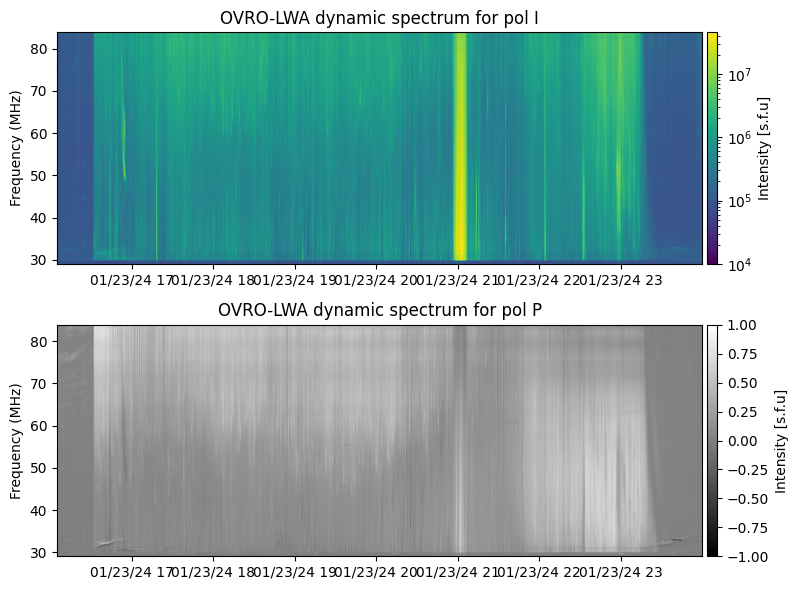

In [95]:
ds_plot_fast(d, pol='IP',vmin=1e4)

In [97]:

hourly_ranges = divide_time_in_hours(time_range_all[0],time_range_all[1], hour_length=1/24)

# display off
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.ioff()
import matplotlib.style as mplstyle
mplstyle.use('fast')

for i in range(len(hourly_ranges)):
    thishour = [ hourly_ranges[i][0].datetime.strftime('%Y-%m-%dT%H:%M:%S'), hourly_ranges[i][1].datetime.strftime('%Y-%m-%dT%H:%M:%S') ]
    fig = d.plot(freq_unit='MHz', pol='IP',timerange=thishour, vmin=1e4)
    plt.gcf().savefig('spec/20240126_'+hourly_ranges[i][0].datetime.strftime('%H_%M')+'.png')
    plt.close(fig)

ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...


In [98]:
# display off
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.ioff()
import matplotlib.style as mplstyle
mplstyle.use('fast')

for i in range(len(hourly_ranges)):
    thishour = [ hourly_ranges[i][0].datetime.strftime('%Y-%m-%dT%H:%M:%S'), hourly_ranges[i][1].datetime.strftime('%Y-%m-%dT%H:%M:%S') ]
    fig = ds_plot_fast(d, pol='IP',timerange=thishour, vmin=1e4)
    plt.gcf().savefig('spec/20240126_'+hourly_ranges[i][0].datetime.strftime('%H_%M')+'.png')
    plt.close(fig)

ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...
ploting dynamic spectrum...


In [ ]:
# read fits and show header
import astropy.io.fits as fits
hdulist = fits.open('test.fits')
hdulist.info()
hdulist[0].header

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (1752, 383, 1, 2)   float32   
  1  SFREQ         1 BinTableHDU     11   383R x 1C   [E]   
  2  UT            1 BinTableHDU     13   1752R x 2C   [J, J]   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                 1752                                                  
NAXIS2  =                  383                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    2                                                  
EXTEND  =                    T                                                  
FILENAME= 'test.fits'                                                           
ORIGIN  = 'NJIT    '           / Location where file was made                   
DATE    = '2024-01-28T22:36:39.814' / Date when file was made                   
OBSERVER= 'EOVSA Team'         / Who to appreciate/blame                        
TELESCOP= 'EOVSA   '        

In [105]:
import os
import re

def extract_date_from_path(path):
    # Regular expression to match the date pattern in directory names
    match = re.search(r'(\d{4})(\d{2})(\d{2})', path)
    if match:
        year, month, day = match.groups()
        return year, month, day
    return None, None, None

def traverse_and_print_dates(directory):
    i=0
    for root, dirs, _ in os.walk(directory):
        for name in dirs:
            full_path = os.path.join(root, name)
            year, month, day = extract_date_from_path(full_path)
            if year and month and day:
                i+=1
                print(i,full_path,f"Year: {year}, Month: {month}, Day: {day}")

# Example usage
directory_path = "/nas5/ovro-lwa-data/beam/beam-data/"
traverse_and_print_dates(directory_path)


1 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230719 Year: 2023, Month: 07, Day: 19
2 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230722 Year: 2023, Month: 07, Day: 22
3 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230723 Year: 2023, Month: 07, Day: 23
4 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230724 Year: 2023, Month: 07, Day: 24
5 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230727 Year: 2023, Month: 07, Day: 27
6 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230728 Year: 2023, Month: 07, Day: 28
7 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230729 Year: 2023, Month: 07, Day: 29
8 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230730 Year: 2023, Month: 07, Day: 30
9 /nas5/ovro-lwa-data/beam/beam-data/202307/beam20230731 Year: 2023, Month: 07, Day: 31
10 /nas5/ovro-lwa-data/beam/beam-data/202308/beam20230801 Year: 2023, Month: 08, Day: 01
11 /nas5/ovro-lwa-data/beam/beam-data/202308/beam20230810 Year: 2023, Month: 08, Day: 10
12 /nas5/ovro-lwa-data/beam/be

115 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231201 Year: 2023, Month: 12, Day: 01
116 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231202 Year: 2023, Month: 12, Day: 02
117 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231203 Year: 2023, Month: 12, Day: 03
118 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231204 Year: 2023, Month: 12, Day: 04
119 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231205 Year: 2023, Month: 12, Day: 05
120 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231207 Year: 2023, Month: 12, Day: 07
121 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231208 Year: 2023, Month: 12, Day: 08
122 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231209 Year: 2023, Month: 12, Day: 09
123 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231210 Year: 2023, Month: 12, Day: 10
124 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231211 Year: 2023, Month: 12, Day: 11
125 /nas5/ovro-lwa-data/beam/beam-data/202312/beam20231212 Year: 2023, Month: 12, Day: 12
126 /nas5/